# Sparkify project - analyzing sparkify customers and their location in US

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mlt
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 

In [2]:
# loading the geographical information about US 
conn = sqlite3.connect('state_db.db')
sqlquery = "SELECT * FROM geo_states;"
US_states = pd.read_sql(sqlquery, con=conn)

In [3]:
# loading user cout of sparkify 
sqlquery = "SELECT * FROM sparkify_users;"
sparkify_users = pd.read_sql(sqlquery,con=conn).drop(columns =['index'])

In [4]:
# merging both dataframes
merged = US_states[['abv','latitude','longitude','population']].merge(sparkify_users, left_on=['abv'], right_on=['location_state'])

In [52]:
# US map longitude and latitude coordinates for geo view
llat = 50
ulat = 80
llon = -100
ulon = -50

### Plot the map

/Users/lamiakasmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Users/lamiakasmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/lamiakasmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


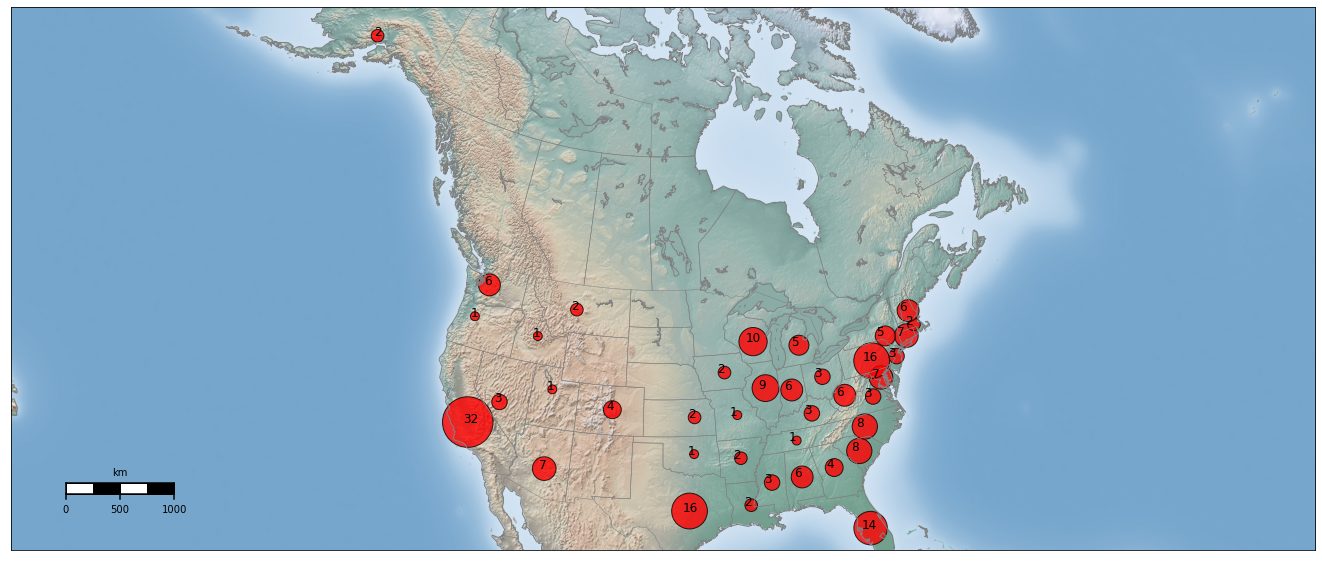

In [71]:
# 1. Draw the map background
fig = plt.figure(figsize=(24, 10))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=llat, lon_0=llon,
            width=12E6, height=5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawmapscale(-145, 20,llon, llat, 1000, barstyle='fancy', fontsize = 10)

df = merged[['latitude','longitude','count']]

# 2. scatter city data, with size reflecting customers
m.scatter(df.longitude.values, df.latitude.values, latlon=True,
          s=80*df['count'].values, c='red', alpha = 0.8, edgecolors='k' )
for x,y,t in zip(df.longitude.values,df.latitude.values,df['count'].values):
    x, y = m(x, y)
    plt.text(0.99*x, y, str(t) , fontsize=12);

## Plot the population distribution vs sparkify customer distribution

In [114]:
pop = merged[['abv','population','count']].sort_values(by='population', ascending=False)

/Users/lamiakasmi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/lamiakasmi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


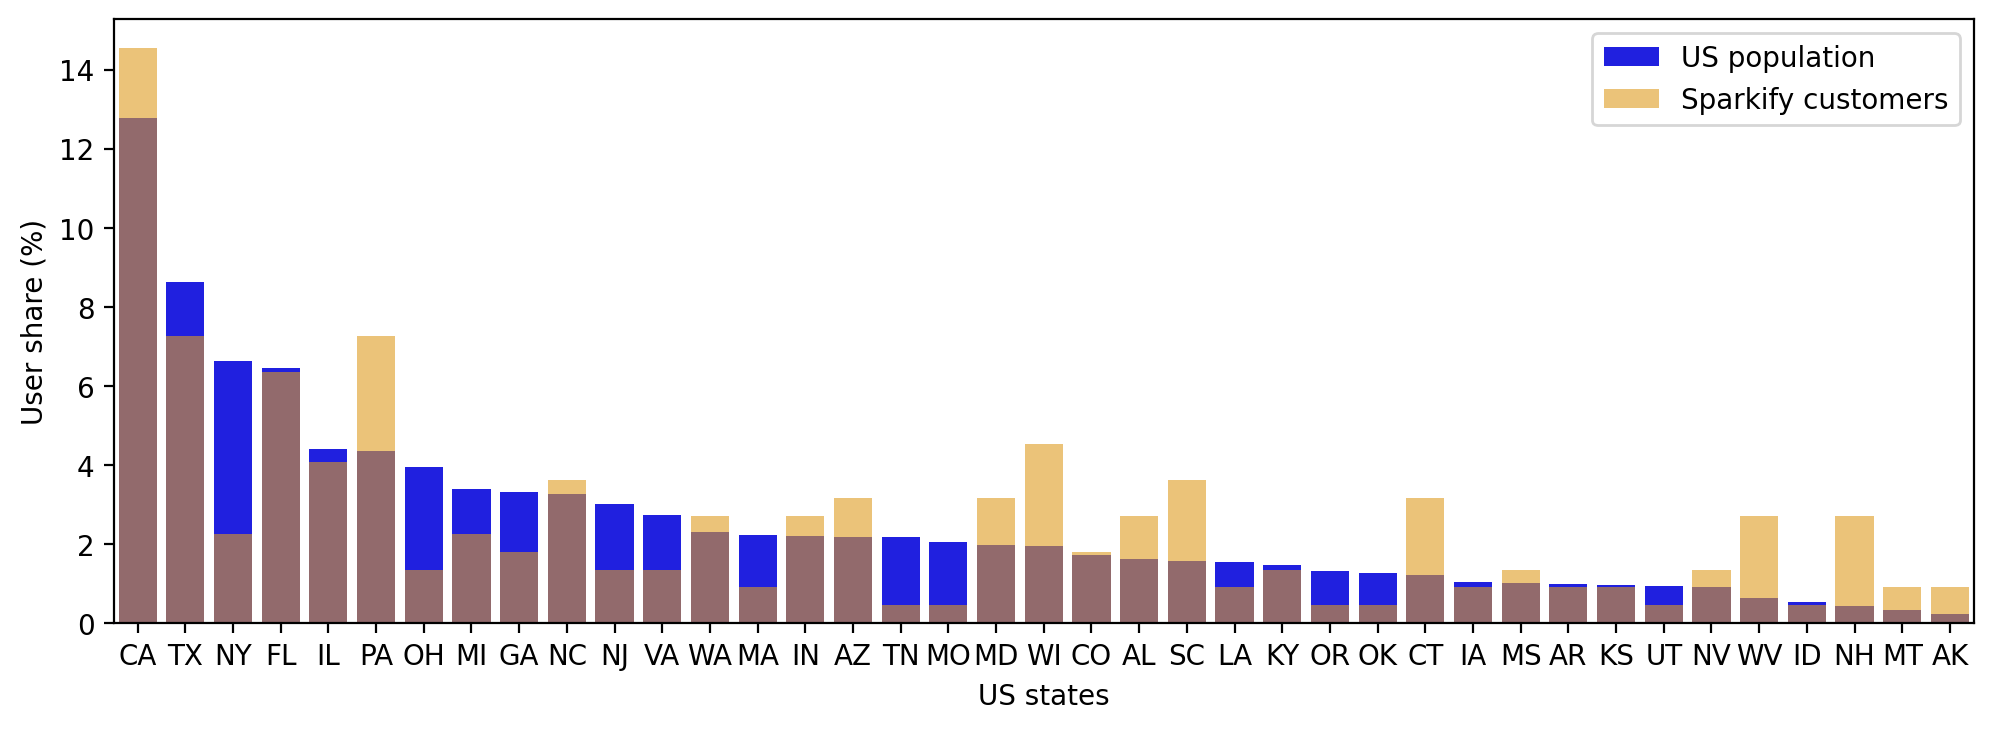

In [116]:
plt.figure(figsize=[12,4], dpi=200)
sns.barplot(pop['abv'],100*pop['population']/pop['population'].sum(), color='b', label = 'US population')
sns.barplot(pop['abv'],100*pop['count']/pop['count'].sum(), color = 'orange',alpha= 0.6, label='Sparkify customers')
plt.ylabel('User share (%)')
plt.xlabel('US states')
plt.legend()